한국어 Word2Vec 만들기(네이버 뉴스)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
import re
from konlpy.tag import Okt

In [28]:
# 상폐기업 = pd.read_csv('./data/상폐기업뉴스.csv')
정상기업 = pd.read_csv("정상_새로합친거.csv",index_col=0)


In [29]:
data=정상기업
# data=pd.concat([상폐기업, 정상기업], axis = 0)
# data=pd.concat([상폐기업, 정상기업], axis = 0)

In [30]:
data.reset_index(inplace=True)
data.drop(["index","뉴스기사본문"],inplace=True,axis=1)

In [31]:
data

,기업,기사발행일,기사제목,뉴스기사본문전처리
0,씨제이이엔엠,2011.08.16. 오전 9:21,"코스닥, IT부품주 '훨훨'",일 코스닥 시장에서는 부품주들이 강세를 보이고 있다. 특히 구글의 모토로라 인수 소...
1,씨제이이엔엠,2011.06.08. 오전 7:58,장마감후 주요 종목뉴스-7일,코스피 시장는 법인청산에 따라 푸드서비스를 계열사에서 제외한다고 일 공시했다. 푸드...
2,씨제이이엔엠,2011.06.07. 오후 5:31,"CJ, CJ푸드서비스 계열사서 제외",는 법인청산에 따라 푸드서비스를 계열사에서 제외한다고 일 공시했다. 푸드서비스의 자...
3,씨제이이엔엠,2011.03.12. 오전 10:01,"현대카드ㆍ현대캐피탈, 사업성공 프로그램 후원",현대카드현대캐피탈은 성공을 향해 열정적으로 도전하는 개인사업자들의 이야기를 담은 리...
4,씨제이이엔엠,2011.03.11. 오후 4:21,"""27일까지 사업성공 스토리에 도전하세요""",현대카드현대캐피탈이 성공을 향해 열정적으로 도전하는 개인사업자들의 이야기를 담은 리...
...,...,...,...,...
6741,에이치엘비,2020.09.22. 오전 5:20,"에이치엘비 리보세라닙, 글로벌 항암제로 성공 가능성↑",에이치엘비가 유럽종양학회에서 리보세라닙의 가치를 입증했다./사진에이치엘비에이치엘비의...
6742,에이치엘비,2020.09.21. 오후 4:18,"에이치엘비, ESMO서 '리보세라닙' 관련 논문 23개 발표",에이치엘비 김제이 기자 에이치엘비는 유럽종양학회에서 리보세라닙 관련 논문이 개...
6743,에이치엘비,2020.12.04. 오후 4:15,"에스퓨얼셀, 에이치엘비와 수소선박 공동개발 '맞손'…""2023년 상용화 목표""",급 수소연료전지선박 개발 협력년 수소유람선 상용화 목표설계 모듈화연료전지 전문업체 ...
6744,에이치엘비,2020.12.30. 오후 5:45,"코스닥, 23년만에 최고치…시총도 지각변동",코스닥지수 지난해 말 대비 . 상승개인 비중 .로 확대거래량 급등한국거래소는 일 년...


기사본문 전처리

In [5]:
# 제거할기사제목 = ['증시 일정', '증시일정', '장마감후', '장 마감 후', '장마감공시', '증시 캘린더', '재송', '투자정보', \
#     '코스닥 기업공시', '장중 주요', '코스닥 3분기 결산', '주요 뉴스 및 공시', '기업공시',' 기업 공시', '장 종료 후', \
#         '특징주A/S', '주요 정보', '오전 공시', '투자정보', '기업 공시', '오늘의 메모', '재테크 캘린더', '추천주 정리', '희망복원 주식클리닉', \
#         '\d{1,2}월 \d{1,2}일', '오늘의 주요 공시', '코스닥 공시', '코스닥 메모', '대박 공모주', '<표>', '오늘의 리포트', \
#         '공략주', '주식상담소', '주식왕 따라잡기', '주식컨설팅', '\d{4} 증시', '춤추는 테마주', '개장시황', \
#         '폭등신호 터진', '대폭등', '매드머니', '주담과 Q&A', '굿바이 \d{4}', '지금 당장 사라', '폭등주', \
#         '\d{4}%', '김정일 사망', '종목대탐험', '종목신호등', 'VIP CLUB', '수급유망주', '기상도', '중소형주', \
#         '국민주식고충처리반', '유망주', '머니Q', '시초가잡아라', '기관 Q&A', '부동산에 투자하려면', '베스트애널리스트', \
#         '코스닥협회장 취임', '코스닥협회', '부동산에 투자하는 방법', '국가품질 경영대회', '증시일정', '머니Q', '추천종목', '티타임 공략주', \
#         '수급유망주', '종목배틀', '\d{4} 증시 결산', '기업설명회', '종목신호등', 'VIP CLUB 추천주', '내일장 공략주 10선', '주간컨센서스동향', \
#         '주담과 Q&A', '조회공시', '주가급등 사유', '관련株들', '게임株', '이시각 Up&Down', '장내 매도', '[인사]', '증시기상도', \
#         '[재송]', '마감시황', '주식부자 속출', '교육주', '티타임 공략주', '\d{1,2}일 증권사 추천종목', '기업IR소식', '[승부주]']
# # 제거제목리스트=[]
# 제거제목리스트 = '|'.join(제거할기사제목)
# data_unique = data.drop_duplicates(['뉴스기사본문'])
# data_result = data_unique[~data_unique['기사제목'].str.contains(제거제목리스트, na=False, case=False)]
# #data_result.to_csv('dd.csv')
# pattern1 = r'\([^)]*\)'
# #pattern2 = r'\[[^)]*\]'
# pattern2 = r"\[([^]]+)\]"



# # data_unique['뉴스기사본문전처리'] = [re.sub(pattern1, '', s) for s in data_unique['뉴스기사본문']]
# # data_unique['뉴스기사본문전처리'] = [re.sub(pattern2, '', s) for s in data_unique['뉴스기사본문전처리']]
# # data_unique['뉴스기사본문전처리'] = [re.sub('[^/^$|\s+/가-힣\.]', '', s) for s in data_unique['뉴스기사본문전처리']]
# # data_unique['뉴스기사본문전처리'] = [re.sub('[[ \s]{2,}\.{2,}]', '', s) for s in data_unique['뉴스기사본문전처리']]
# # data_unique['뉴스기사본문전처리'] = [re.sub('\n', '', s) for s in data_unique['뉴스기사본문전처리']]
# # data_unique
# # data_unique.to_csv('dd.csv', index=None)





# data_result['뉴스기사본문전처리'] = [re.sub(pattern1, '', s) for s in data_result['뉴스기사본문']]
# data_result['뉴스기사본문전처리'] = [re.sub(pattern2, '', s) for s in data_result['뉴스기사본문전처리']]
# data_result['뉴스기사본문전처리'] = [re.sub('[^/^$|\s+/가-힣\.]', '', s) for s in data_result['뉴스기사본문전처리']]
# data_result['뉴스기사본문전처리'] = [re.sub('[[ \s]{2,}\.{2,}]', '', s) for s in data_result['뉴스기사본문전처리']]
# data_result['뉴스기사본문전처리'] = [re.sub('\n', '', s) for s in data_result['뉴스기사본문전처리']]
# data_result
# data_result.to_csv('dd_정상.csv', index=None)

C:\Users\jangd\AppData\Local\Temp\ipykernel_11072\1157942679.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_result['뉴스기사본문전처리'] = [re.sub(pattern1, '', s) for s in data_result['뉴스기사본문']]
C:\Users\jangd\AppData\Local\Temp\ipykernel_11072\1157942679.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_result['뉴스기사본문전처리'] = [re.sub(pattern2, '', s) for s in data_result['뉴스기사본문전처리']]
C:\Users\jangd\AppData\Local\Temp\ipykernel_11072\1157942679.py:38: SettingWithCopyWarning: 
A value is trying to

전처리된 기사 본문 불러와서 word2vec시작

In [6]:
# train_data = pd.read_csv('./dd_정상.csv')
# train_data["기사발행일"]

0        2011.12.13. 오전 8:24
1        2011.11.17. 오전 8:47
2       2011.12.06. 오전 10:35
3        2011.10.10. 오후 3:03
4       2011.08.31. 오전 10:32
                ...         
2490     2020.09.22. 오전 5:20
2491     2020.09.21. 오후 4:18
2492     2020.12.04. 오후 4:15
2493     2020.12.30. 오후 5:45
2494     2020.12.22. 오전 9:17
Name: 기사발행일, Length: 2495, dtype: object

In [12]:
time=data["기사발행일"].str.split('.').tolist()
time_df=pd.DataFrame(time,columns=['년','월','일','시간'])
time_df.drop("시간",axis=1,inplace=True)
time_df

,년,월,일
0,2011,08,16
1,2011,06,08
2,2011,06,07
3,2011,03,12
4,2011,03,11
...,...,...,...
6741,2020,09,22
6742,2020,09,21
6743,2020,12,04
6744,2020,12,30


In [32]:
time_data=pd.concat([time_df,data],axis=1)
# time_data["기사제목"].groupby(time_data["년"]).count()
time_data


,년,월,일,기업,기사발행일,기사제목,뉴스기사본문전처리
0,2011,08,16,씨제이이엔엠,2011.08.16. 오전 9:21,"코스닥, IT부품주 '훨훨'",일 코스닥 시장에서는 부품주들이 강세를 보이고 있다. 특히 구글의 모토로라 인수 소...
1,2011,06,08,씨제이이엔엠,2011.06.08. 오전 7:58,장마감후 주요 종목뉴스-7일,코스피 시장는 법인청산에 따라 푸드서비스를 계열사에서 제외한다고 일 공시했다. 푸드...
2,2011,06,07,씨제이이엔엠,2011.06.07. 오후 5:31,"CJ, CJ푸드서비스 계열사서 제외",는 법인청산에 따라 푸드서비스를 계열사에서 제외한다고 일 공시했다. 푸드서비스의 자...
3,2011,03,12,씨제이이엔엠,2011.03.12. 오전 10:01,"현대카드ㆍ현대캐피탈, 사업성공 프로그램 후원",현대카드현대캐피탈은 성공을 향해 열정적으로 도전하는 개인사업자들의 이야기를 담은 리...
4,2011,03,11,씨제이이엔엠,2011.03.11. 오후 4:21,"""27일까지 사업성공 스토리에 도전하세요""",현대카드현대캐피탈이 성공을 향해 열정적으로 도전하는 개인사업자들의 이야기를 담은 리...
...,...,...,...,...,...,...,...
6741,2020,09,22,에이치엘비,2020.09.22. 오전 5:20,"에이치엘비 리보세라닙, 글로벌 항암제로 성공 가능성↑",에이치엘비가 유럽종양학회에서 리보세라닙의 가치를 입증했다./사진에이치엘비에이치엘비의...
6742,2020,09,21,에이치엘비,2020.09.21. 오후 4:18,"에이치엘비, ESMO서 '리보세라닙' 관련 논문 23개 발표",에이치엘비 김제이 기자 에이치엘비는 유럽종양학회에서 리보세라닙 관련 논문이 개...
6743,2020,12,04,에이치엘비,2020.12.04. 오후 4:15,"에스퓨얼셀, 에이치엘비와 수소선박 공동개발 '맞손'…""2023년 상용화 목표""",급 수소연료전지선박 개발 협력년 수소유람선 상용화 목표설계 모듈화연료전지 전문업체 ...
6744,2020,12,30,에이치엘비,2020.12.30. 오후 5:45,"코스닥, 23년만에 최고치…시총도 지각변동",코스닥지수 지난해 말 대비 . 상승개인 비중 .로 확대거래량 급등한국거래소는 일 년...


In [34]:
time_data.drop(["월","일"],inplace=True,axis=1)
time_data

,년,기업,기사발행일,기사제목,뉴스기사본문전처리
0,2011,씨제이이엔엠,2011.08.16. 오전 9:21,"코스닥, IT부품주 '훨훨'",일 코스닥 시장에서는 부품주들이 강세를 보이고 있다. 특히 구글의 모토로라 인수 소...
1,2011,씨제이이엔엠,2011.06.08. 오전 7:58,장마감후 주요 종목뉴스-7일,코스피 시장는 법인청산에 따라 푸드서비스를 계열사에서 제외한다고 일 공시했다. 푸드...
2,2011,씨제이이엔엠,2011.06.07. 오후 5:31,"CJ, CJ푸드서비스 계열사서 제외",는 법인청산에 따라 푸드서비스를 계열사에서 제외한다고 일 공시했다. 푸드서비스의 자...
3,2011,씨제이이엔엠,2011.03.12. 오전 10:01,"현대카드ㆍ현대캐피탈, 사업성공 프로그램 후원",현대카드현대캐피탈은 성공을 향해 열정적으로 도전하는 개인사업자들의 이야기를 담은 리...
4,2011,씨제이이엔엠,2011.03.11. 오후 4:21,"""27일까지 사업성공 스토리에 도전하세요""",현대카드현대캐피탈이 성공을 향해 열정적으로 도전하는 개인사업자들의 이야기를 담은 리...
...,...,...,...,...,...
6741,2020,에이치엘비,2020.09.22. 오전 5:20,"에이치엘비 리보세라닙, 글로벌 항암제로 성공 가능성↑",에이치엘비가 유럽종양학회에서 리보세라닙의 가치를 입증했다./사진에이치엘비에이치엘비의...
6742,2020,에이치엘비,2020.09.21. 오후 4:18,"에이치엘비, ESMO서 '리보세라닙' 관련 논문 23개 발표",에이치엘비 김제이 기자 에이치엘비는 유럽종양학회에서 리보세라닙 관련 논문이 개...
6743,2020,에이치엘비,2020.12.04. 오후 4:15,"에스퓨얼셀, 에이치엘비와 수소선박 공동개발 '맞손'…""2023년 상용화 목표""",급 수소연료전지선박 개발 협력년 수소유람선 상용화 목표설계 모듈화연료전지 전문업체 ...
6744,2020,에이치엘비,2020.12.30. 오후 5:45,"코스닥, 23년만에 최고치…시총도 지각변동",코스닥지수 지난해 말 대비 . 상승개인 비중 .로 확대거래량 급등한국거래소는 일 년...


In [35]:
print(len(time_data))  # 기사본문 개수 출력

6746


In [36]:
# NULL 값 존재 유무
print(time_data.isnull().values.any())

False


In [81]:
# train_data = train_data.dropna(how = 'any')  # Null 값이 존재하는 행 제거
# print(train_data.isnull().values.any())      # Null 값이 존재하는지 확인

False


In [37]:
# 불용어 정의
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [38]:
# 형태소 분석기 mecab를 사용한 토큰화 작업 (다소 시간 소요)

okt = Okt()
tokenized_data = []
output=[]
for sentence in time_data['뉴스기사본문전처리']:
    temp_X = okt.nouns(sentence)  # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords]  # 불용어 제거

    tokenized_data.append(temp_X)


KeyboardInterrupt: 

한글자제거

In [ ]:
remove_one_word=[]
for j in range(len(tokenized_data)):
    a=[x for x in tokenized_data[j] if len(x)>1]
    remove_one_word.append(a)
    

In [ ]:
len(remove_one_word)
list_text_1=sum(remove_one_word, [])

In [ ]:
from collections import Counter

In [ ]:
횟수=Counter(list_text_1)
횟수['폐지']
# for i in range(len(list_text_1)):
    
# print(Counter(list_text_1))

70

기사의 길이 및 분포 확인

기사의 최대 길이 : 1832
기사의 평균 길이 : 169.4801603206413


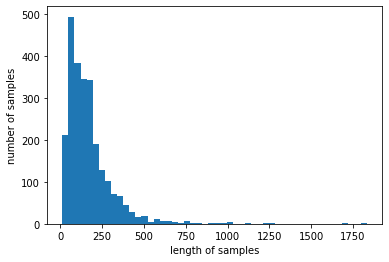

In [ ]:
# 기사 길이 분포 확인

print('기사의 최대 길이 :',max(len(l) for l in tokenized_data))
print('기사의 평균 길이 :',sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(s) for s in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show();

word2vec훈련

In [ ]:
# Word2Vec 훈련시키기

from gensim.models import Word2Vec
model = Word2Vec(sentences = remove_one_word, window = 5, min_count = 5, workers = 4, sg = 1)

In [ ]:
# 완성된 임베딩 매트릭스의 크기 확인

model.wv.vectors.shape

(6071, 100)

유사도확인

In [ ]:
print(model.wv.most_similar(["부도"]))

[('조선업', 0.9377299547195435), ('여건', 0.9161196351051331), ('일감', 0.9144211411476135), ('조선소', 0.913827657699585), ('체감', 0.9020488262176514), ('수십', 0.896088182926178), ('경영난', 0.8959640860557556), ('과잉', 0.895317554473877), ('가중', 0.8934265375137329), ('예산', 0.8896914720535278)]


In [ ]:
print(model.wv.most_similar(["부도","폐지"],topn=21))
dataframe_1=model.wv.most_similar(["부도","폐지"],topn=21)
dataframe=pd.DataFrame(dataframe_1)
dataframe.columns=['단어','유사도']
dataframe

[('요건', 0.9269108772277832), ('조선업', 0.9253425598144531), ('차손', 0.9067156910896301), ('자금난', 0.9026140570640564), ('나스닥', 0.9016484022140503), ('손상', 0.901064395904541), ('경영난', 0.8985086679458618), ('실질', 0.8978813886642456), ('우회', 0.8888149857521057), ('활기', 0.8807721138000488), ('잠식', 0.8796749711036682), ('폴리에스터', 0.879207193851471), ('논리', 0.879190981388092), ('수십', 0.8786280751228333), ('환원', 0.877484917640686), ('전부', 0.8766326308250427), ('스카', 0.8760170340538025), ('거론', 0.8736883401870728), ('시바', 0.8728667497634888), ('만약', 0.8725762367248535), ('견해', 0.871769368648529)]


,단어,유사도
0,요건,0.926911
1,조선업,0.925343
2,차손,0.906716
3,자금난,0.902614
4,나스닥,0.901648
5,손상,0.901064
6,경영난,0.898509
7,실질,0.897881
8,우회,0.888815
9,활기,0.880772


In [ ]:
print(model.wv.most_similar(["폐지"],topn=20))
dataframe_1=model.wv.most_similar(["폐지"],topn=20)
dataframe=pd.DataFrame(dataframe_1)
dataframe.columns=['단어','유사도']
dataframe

[('통과', 0.9047094583511353), ('예비', 0.8779447078704834), ('신청서', 0.8575072884559631), ('요건', 0.8562508821487427), ('스카', 0.8530469536781311), ('청구서', 0.8470539450645447), ('오젠', 0.8457006216049194), ('잠식', 0.843666672706604), ('심사', 0.8404817581176758), ('년차', 0.8403648734092712), ('규정', 0.8343306183815002), ('유가증권', 0.8318232297897339), ('제출', 0.8272777795791626), ('차손', 0.8265396952629089), ('새내', 0.8249636292457581), ('실질', 0.8237891793251038), ('기주', 0.8225191235542297), ('조항', 0.8187605738639832), ('우량', 0.8173086047172546), ('손상', 0.8157567977905273)]


,단어,유사도
0,통과,0.904709
1,예비,0.877945
2,신청서,0.857507
3,요건,0.856251
4,스카,0.853047
5,청구서,0.847054
6,오젠,0.845701
7,잠식,0.843667
8,심사,0.840482
9,년차,0.840365


In [ ]:
print(model.wv.most_similar(["위기"],topn=20))
dataframe_1=model.wv.most_similar(["위기"],topn=20)
dataframe=pd.DataFrame(dataframe_1)
dataframe.columns=['단어','유사도']
dataframe

[('재정', 0.8731968998908997), ('불황', 0.7792190909385681), ('사태', 0.7790985107421875), ('침체', 0.759259819984436), ('유로존', 0.7591056823730469), ('경기', 0.7483800053596497), ('완화', 0.7103816270828247), ('부동산', 0.709751546382904), ('정책', 0.7019065618515015), ('부도', 0.6969684362411499), ('여파', 0.6955448389053345), ('국채', 0.695263683795929), ('해결', 0.694519579410553), ('중소', 0.6902941465377808), ('불안감', 0.6886386275291443), ('나라', 0.6869720816612244), ('순환', 0.6846332550048828), ('불안', 0.6825416684150696), ('위축', 0.681601345539093), ('자금난', 0.6803576350212097)]


,단어,유사도
0,재정,0.873197
1,불황,0.779219
2,사태,0.779099
3,침체,0.759260
4,유로존,0.759106
5,경기,0.748380
6,완화,0.710382
7,부동산,0.709752
8,정책,0.701907
9,부도,0.696968


In [39]:
time_data['뉴스기사 레이블']=time_data['기사제목']

뉴스기사 레이블 시키기

In [40]:
keywords=['상폐', '적격성', '이의신청', '폐지']
for i in range(len(time_data)):
    if any(keyword in str(time_data["뉴스기사본문전처리"][i]) for keyword in keywords)==True:
        time_data['뉴스기사 레이블'][i]=1
    else:
        time_data['뉴스기사 레이블'][i]=0

In [45]:
time_data_1=time_data.groupby(["기업","년"]).sum()
time_data_1

,,기사발행일,기사제목,뉴스기사본문전처리,뉴스기사 레이블
기업,년,,,,
경창산업,2013,2013.11.29. 오후 3:552013.11.29. 오후 1:372013.11....,"경창산업 ""내가 진짜 中수혜주"" 연초 대비 125%↑[특징주]경창산업, 3분기 호실...",자동차 부품업체 경창산업이 올해 분기 호실적을 기록하자 신고가를 다시 쓰며 급등세를...,0
고영테크놀러지,2011,2011.12.23. 오후 4:132011.11.15. 오전 10:012011.11...,"고영테크, 10만주 규모 신주인수권 행사고영, 연 50% 성장 세계 1위…주가가 성...",고영테크놀러지는 만주의 신주인수권을 행사한다고 일 공시했다. 이는 발행주식총수 대비...,1
광림,2016,2016.12.12. 오후 5:442016.12.12. 오후 5:382016.12....,"거래소, 광림 주가급등 조회공시 요구나노스, 최대주주 광림 외 1명으로 변경광림 ""...",김현정 기자 한국거래소는 코스닥 상장사 광림에 최근 주가급등과 관련한 조회공시를...,0
금화피에스시,2013,2013.10.17. 오후 3:402013.08.09. 오후 2:552013.08....,"금화피에스시, 134억원 규모 복합화력발전소 폐열회수장치 교체공사 수주금화피에스시,...",금화피에스시는 현대건설로부터 복합화력발전소 폐열회수장치 교체공사를 수주했다고 일 ...,9
나스미디어,2017,2017.12.22. 오전 10:572017.12.05. 오후 6:152017.11...,"[fnRASSI]나스미디어, 52주 신고가...3.22% ↑[ET투자뉴스][나스미디...",나스미디어는 주신고가를 기록하고 있어 주목할만하다. 동종목의 현재 주가는 원 선에서...,0
...,...,...,...,...,...
하이록코리아,2012,2012.11.13. 오전 9:212012.11.13. 오전 7:452012.07....,"[특징주] 하이록코리아, 급락 하루만에 반등…""눈높이 낮출 이유 없다""""피팅주 주식...",하이록코리아가 눈높이를 낮출 이유가 없다는 증권사의 분석에 급락 하루만에 상승 반등...,0
한국정보통신,2015,2015.11.27. 오후 3:202015.11.16. 오전 9:482015.09....,"한국정보통신, 최대주주 변경 주식 담보제공 계약 체결[특징주]한국정보통신, 中알리페...",한국정보통신은 박헌서 한국정보통신 회장이 최대주주 변경을 수반하는 주식 담보제공 ...,0
해성산업,2013,2013.02.21. 오전 8:112013.12.26. 오후 3:512013.12....,<생생코스닥>해성산업，주당 100원 현금배당 결정<표> 코스닥 외국인 순매수도 상위...,해성산업은 보통주 주당 원의 현금배당을 결정했다고 일 공시했다.시가배당률 .이며 배...,2


In [48]:
sum_df=time_data.groupby(["기업","년"]).count()
sum_df

,,기사발행일,기사제목,뉴스기사본문전처리,뉴스기사 레이블
기업,년,,,,
경창산업,2013,60,60,60,60
고영테크놀러지,2011,46,46,46,46
광림,2016,55,55,55,55
금화피에스시,2013,70,70,70,70
나스미디어,2017,69,69,69,69
...,...,...,...,...,...
하이록코리아,2012,69,69,69,69
한국정보통신,2015,22,22,22,22
해성산업,2013,20,20,20,20


In [50]:
time_data_1["부도기사 비율"]=round(time_data_1["뉴스기사 레이블"]/sum_df["뉴스기사 레이블"]*100,2)
final_df=pd.DataFrame(time_data_1["부도기사 비율"])
final_df.to_csv("okt_word2vec_정상기업_부도기사 비율.csv",encoding="utf-8-sig")
final_df

,,부도기사 비율
기업,년,
경창산업,2013,0.00
고영테크놀러지,2011,2.17
광림,2016,0.00
금화피에스시,2013,12.86
나스미디어,2017,0.00
...,...,...
하이록코리아,2012,0.00
한국정보통신,2015,0.00
해성산업,2013,10.00
